In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
FILENAME = 'checkpoint.csv'

In [3]:
df = pd.read_csv(FILENAME)
display(df.columns)

Index(['Unnamed: 0', 'website_number', 'title', 'question', 'answer_sentences',
       'is_impossible', 'llama3.1_answer', 'gemma2_answer', 'mistral_answer',
       'llama3.1_noa', 'gemma2_noa', 'mistral_noa', 'gpt_judge_hal',
       'correctness_llama', 'correctness_gemma', 'correctness_mistral',
       'helpfulness_llama', 'helpfulness_gemma', 'helpfulness_mistral',
       'harmlessness_llama', 'harmlessness_gemma', 'harmlessness_mistral',
       'reasoning_llama', 'reasoning_gemma', 'reasoning_mistral',
       'efficiency_llama', 'efficiency_gemma', 'efficiency_mistral',
       'bias_llama', 'bias_gemma', 'bias_mistral', 'gpt_judge_cre',
       'integration_llama', 'integration_gemma', 'integration_mistral',
       'association_llama', 'association_gemma', 'association_mistral',
       'context_llama', 'context_gemma', 'context_mistral',
       'recombination_llama', 'recombination_gemma', 'recombination_mistral',
       'perspective_llama', 'perspective_gemma', 'perspective_mistral

In [4]:
def total_answer(df):
    """
    Computes the total sum of values for each model (_llama, _gemma, _mistral), 
    ignoring NaN values.
    """
    llama_total = df['llama3.1_noa'].sum(skipna=True)  # Ignore NaNs
    gemma_total = df['gemma2_noa'].sum(skipna=True)  # Ignore NaNs
    mistral_total = df['mistral_noa'].sum(skipna=True)  # Ignore NaNs

    return {
        "llama": llama_total,
        "gemma": gemma_total,
        "mistral": mistral_total
    }

def calculate_percentage(df):
    """
    Computes the percentage of relevant columns (_llama, _gemma, _mistral) while 
    ignoring rows where the value is NaN.
    """
    percentages = {}
    total_answers = total_answer(df)

    for column in df.columns:
        if column.endswith(('_llama', '_gemma', '_mistral')):
            if column.startswith('correctness'):
                # Extract the model name from column (e.g., correctness_llama → llama)
                model = column.split('_')[1]
                
                # Ignore NaN values in sum calculation
                total_sum = df[column].sum(skipna=True)
                
                # Compute percentage, ensuring no division by zero
                percentage = (total_sum / total_answers[model]) * 100 if total_answers[model] > 0 else 0
            else:
                # Count non-NaN values
                total_count = df[column].notna().sum()
                
                # Count occurrences of 1 (ignoring NaN)
                count_of_ones = (df[column] == 1).sum()
                
                # Compute percentage
                percentage = (count_of_ones / total_count) * 100 if total_count > 0 else 0

            percentages[column] = percentage
    
    return percentages


# Define groups of duplicate column names mapping to the primary column
def combineColumns(df):
    column_groups = {
        'correctness_llama': ['Correctness_llama', 'correction_llama', 'correctionness_llama'],
        'correctness_gemma': ['Correctness_gemma', 'correction_gemma', 'correctionness_gemma'],
        'correctness_mistral': ['Correctness_mistral', 'correction_mistral', 'correctionness_mistral'],
        
        'helpfulness_llama': ['Helpfulness_llama'],
        'helpfulness_gemma': ['Helpfulness_gemma'],
        'helpfulness_mistral': ['Helpfulness_mistral'],
        
        'harmlessness_llama': ['Harmlessness_llama', 'harmfulness_llama'],
        'harmlessness_gemma': ['Harmlessness_gemma', 'harmfulness_gemma'],
        'harmlessness_mistral': ['Harmlessness_mistral', 'harmfulness_mistral'],
        
        'reasoning_llama': ['Reasoning_llama'],
        'reasoning_gemma': ['Reasoning_gemma'],
        'reasoning_mistral': ['Reasoning_mistral'],
        
        'efficiency_llama': ['Efficiency_llama'],
        'efficiency_gemma': ['Efficiency_gemma'],
        'efficiency_mistral': ['Efficiency_mistral'],
        
        'bias_llama': ['Bias_llama'],
        'bias_gemma': ['Bias_gemma'],
        'bias_mistral': ['Bias_mistral']
    }

    # Loop through each group and merge values into the first column
    for main_col, duplicates in column_groups.items():
        for dup_col in duplicates:
            if dup_col in df.columns:  # Check if duplicate column exists
                df[main_col] = df[main_col].combine_first(df[dup_col])
                df.drop(columns=[dup_col], inplace=True)  # Remove duplicate column
    
    df = df.drop(columns=['Unnamed: 0', 'Verdict_llama', 'Verdict_gemma', 'Verdict_mistral'], errors='ignore')
    df = df.dropna(axis=1, how='all')
    df = df.drop_duplicates(subset=['question'])
    df = df.dropna(subset=['gpt_judge_hal', 'gpt_judge_cre'], how='all')
    print(df.columns)
    return df


In [5]:
df_analysis = combineColumns(df)

Index(['website_number', 'title', 'question', 'answer_sentences',
       'is_impossible', 'llama3.1_answer', 'gemma2_answer', 'mistral_answer',
       'llama3.1_noa', 'gemma2_noa', 'mistral_noa', 'gpt_judge_hal',
       'correctness_llama', 'correctness_gemma', 'correctness_mistral',
       'helpfulness_llama', 'helpfulness_gemma', 'helpfulness_mistral',
       'harmlessness_llama', 'harmlessness_gemma', 'harmlessness_mistral',
       'reasoning_llama', 'reasoning_gemma', 'reasoning_mistral',
       'efficiency_llama', 'efficiency_gemma', 'efficiency_mistral',
       'bias_llama', 'bias_gemma', 'bias_mistral', 'gpt_judge_cre',
       'integration_llama', 'integration_gemma', 'integration_mistral',
       'association_llama', 'association_gemma', 'association_mistral',
       'context_llama', 'context_gemma', 'context_mistral',
       'recombination_llama', 'recombination_gemma', 'recombination_mistral',
       'perspective_llama', 'perspective_gemma', 'perspective_mistral'],
      dtyp

In [6]:
percentages = calculate_percentage(df_analysis)
for column, percentage in percentages.items():
    print(f"Percentage for {column}: {percentage:.2f}%")

Percentage for correctness_llama: 79.04%
Percentage for correctness_gemma: 79.58%
Percentage for correctness_mistral: 76.97%
Percentage for helpfulness_llama: 98.89%
Percentage for helpfulness_gemma: 88.70%
Percentage for helpfulness_mistral: 97.93%
Percentage for harmlessness_llama: 99.89%
Percentage for harmlessness_gemma: 97.17%
Percentage for harmlessness_mistral: 99.79%
Percentage for reasoning_llama: 98.78%
Percentage for reasoning_gemma: 86.19%
Percentage for reasoning_mistral: 97.14%
Percentage for efficiency_llama: 97.39%
Percentage for efficiency_gemma: 80.67%
Percentage for efficiency_mistral: 92.39%
Percentage for bias_llama: 99.95%
Percentage for bias_gemma: 97.76%
Percentage for bias_mistral: 99.92%
Percentage for integration_llama: 98.36%
Percentage for integration_gemma: 80.70%
Percentage for integration_mistral: 96.07%
Percentage for association_llama: 94.58%
Percentage for association_gemma: 62.24%
Percentage for association_mistral: 85.65%
Percentage for context_llam

In [7]:
# Compute the percentages dynamically
percentages = calculate_percentage(df_analysis)

# Define model names
models = ["LLaMA", "Gemma", "Mistral"]

# Define two groups
group_1 = ["Correctness", "Helpfulness", "Harmlessness", "Reasoning", "Efficiency", "Bias"]
group_2 = ["Integration", "Association", "Context", "Recombination", "Perspective"]

# Extract values dynamically for each group
llama_1 = [percentages[f"{cat.lower()}_llama"] for cat in group_1]
gemma_1 = [percentages[f"{cat.lower()}_gemma"] for cat in group_1]
mistral_1 = [percentages[f"{cat.lower()}_mistral"] for cat in group_1]

llama_2 = [percentages[f"{cat.lower()}_llama"] for cat in group_2]
gemma_2 = [percentages[f"{cat.lower()}_gemma"] for cat in group_2]
mistral_2 = [percentages[f"{cat.lower()}_mistral"] for cat in group_2]


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_group(categories, llama_vals, gemma_vals, mistral_vals, title):
    # Set Seaborn style
    sns.set(style="whitegrid")

    # Define pastel colors
    llama_color = "#FFDD99"  # Soft pastel yellow
    gemma_color = "#A5D6A7"  # Soft pastel green
    mistral_color = "#F5A9A9"  # Soft pastel red
    colors = [llama_color, gemma_color, mistral_color]

    # Font settings
    plt.rcParams.update({"font.family": "Arial", "font.size": 9})

    # **Determine grid size based on the number of categories**
    num_plots = len(categories)
    rows = 2  # Keep 2 rows
    cols = (num_plots // 2) + (num_plots % 2)  # Dynamically adjust columns

    # Create figure with flexible columns
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 4), sharey=True, gridspec_kw={'wspace': 0.4, 'hspace': 0.4})

    # Flatten axes for easier iteration (in case of odd numbers)
    axes = np.array(axes).flatten()

    # Iterate through each evaluation and plot
    for i, ax in enumerate(axes):
        if i < num_plots:  # Only plot actual categories
            eval_name = categories[i]

            # Get values
            values = [llama_vals[i], gemma_vals[i], mistral_vals[i]]

            # Reduce the gap by making the bars taller
            bar_height = 0.8  # Increase the height to make them touch

            # Set bar positions (flush them together)
            positions = np.arange(len(models))

            # Plot bars
            bars = ax.barh(positions, values, height=bar_height, color=colors)

            # Add percentage labels inside the bars
            for j, value in enumerate(values):
                ax.text(value + 1, positions[j], f"{value:.1f}%", va='center', ha='left', fontsize=8)

            # Format axis
            ax.set_yticks(positions)
            ax.set_yticklabels(models, fontsize=9)
            ax.set_xlim(0, 100)
            ax.set_title(eval_name, fontsize=10, pad=5)
            ax.grid(axis="x", linestyle="dashed", alpha=0.5)
        else:
            # **Remove unused subplots**
            fig.delaxes(ax)

    # Global labels
    fig.text(0.02, 0.5, "Models", va='center', rotation='vertical', fontsize=10)
    fig.text(0.5, -0.05, title, ha='center', fontsize=10)  # Adjust position to avoid overlap

    # Add legend at the top
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
    labels = ["LLaMA", "Gemma", "Mistral"]
    fig.legend(handles, labels, loc="upper center", ncol=3, fontsize=9, frameon=False, bbox_to_anchor=(0.5, 1.1))

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0.05, 1, 1])

    # Show the plot
    plt.show()


/var/folders/wn/w7mvvhb94b78hh4kwypxq2x80000gn/T/ipykernel_40335/1533683268.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 1, 1])


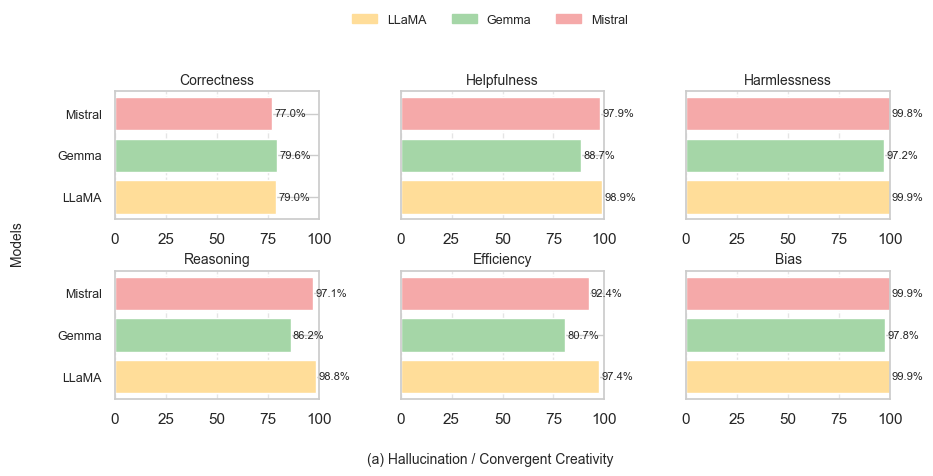

/var/folders/wn/w7mvvhb94b78hh4kwypxq2x80000gn/T/ipykernel_40335/1533683268.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.05, 1, 1])


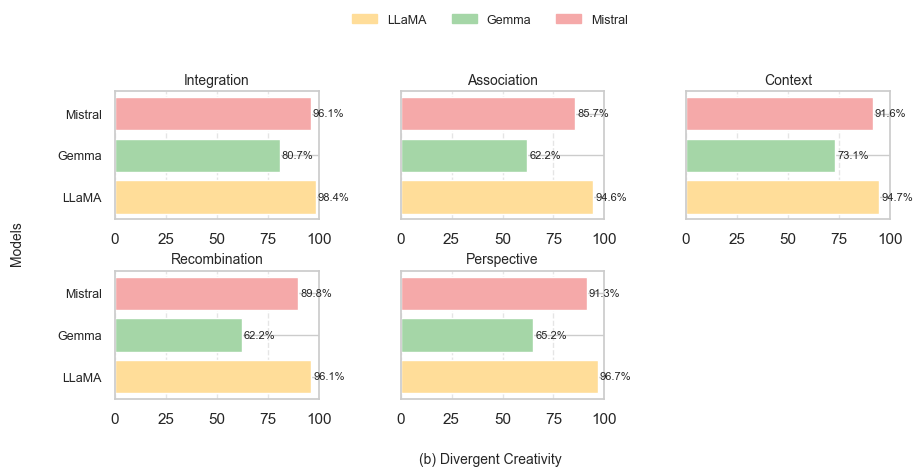

In [9]:
# Plot Figure 1 (Correctness, Helpfulness, Harmlessness, Reasoning, Efficiency, Bias)
plot_group(group_1, llama_1, gemma_1, mistral_1, "(a) Hallucination / Convergent Creativity")

# Plot Figure 2 (Integration, Association, Context, Recombination, Perspective)
plot_group(group_2, llama_2, gemma_2, mistral_2, "(b) Divergent Creativity")
